In [1]:
!pip install pandas matplotlib seaborn scikit-learn openpyxl


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.24.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.3.24 requires numpy>=1.26.2; python_version < "3.13", but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
label-studio 1.4.1.post1 requires jsonschema==3.2.0, but you hav

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Set style for plots
sns.set(style='whitegrid')

In [4]:
# Step 2: Load Your Dataset
df = pd.read_csv("./Dataset.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_id            50000 non-null  object 
 1   age                   50000 non-null  int64  
 2   gender                50000 non-null  object 
 3   insurance_type        50000 non-null  object 
 4   department            50000 non-null  object 
 5   diagnosis             50000 non-null  object 
 6   treatment             50000 non-null  object 
 7   admission_date        50000 non-null  object 
 8   discharge_date        50000 non-null  object 
 9   length_of_stay_days   50000 non-null  int64  
 10  severity_score_1_10   50000 non-null  float64
 11  comorbidity_count     50000 non-null  int64  
 12  outcome               50000 non-null  object 
 13  readmission_30d_flag  50000 non-null  int64  
 14  total_cost_usd        50000 non-null  float64
dtypes: float64(2), int6

In [6]:
print(df.describe())

                age  length_of_stay_days  severity_score_1_10  \
count  50000.000000         50000.000000         50000.000000   
mean      52.090100             5.857000             4.259260   
std       17.947036             6.553464             2.081379   
min        0.000000             0.000000             1.000000   
25%       40.000000             2.000000             2.600000   
50%       52.000000             4.000000             4.100000   
75%       64.000000             7.000000             5.700000   
max      100.000000            60.000000            10.000000   

       comorbidity_count  readmission_30d_flag  total_cost_usd  
count       50000.000000          50000.000000    50000.000000  
mean            2.627860              0.221240    11745.194667  
std             1.170555              0.415086     9557.404139  
min             0.000000              0.000000     1657.520000  
25%             2.000000              0.000000     6086.200000  
50%             3.000000

In [7]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
patient_id              0
age                     0
gender                  0
insurance_type          0
department              0
diagnosis               0
treatment               0
admission_date          0
discharge_date          0
length_of_stay_days     0
severity_score_1_10     0
comorbidity_count       0
outcome                 0
readmission_30d_flag    0
total_cost_usd          0
dtype: int64


In [8]:
print("\nOutcome Counts:")
print(df['outcome'].value_counts())


Outcome Counts:
outcome
Recovered       27709
Complication    22196
Deceased           95
Name: count, dtype: int64


In [9]:
print("\nDepartment Counts:")
print(df['department'].value_counts())


Department Counts:
department
Internal Medicine    10858
Emergency             9010
General Surgery       5106
Cardiology            5027
Orthopedics           4985
Neurology             4040
ICU                   3987
Pediatrics            3933
Oncology              3054
Name: count, dtype: int64


In [10]:
print("\nReadmission Flag (0 = No, 1 = Yes):")
print(df['readmission_30d_flag'].value_counts())


Readmission Flag (0 = No, 1 = Yes):
readmission_30d_flag
0    38938
1    11062
Name: count, dtype: int64


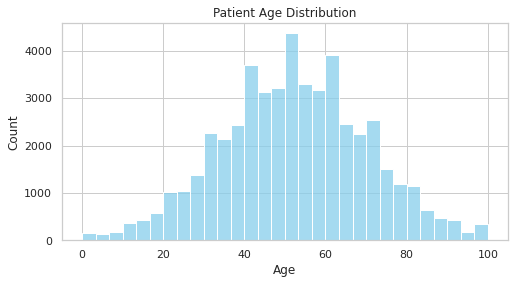

In [14]:
#Step 6: Visualizations
plt.figure(figsize=(8, 4))
sns.histplot(df['age'].values, bins=30, color='skyblue')
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


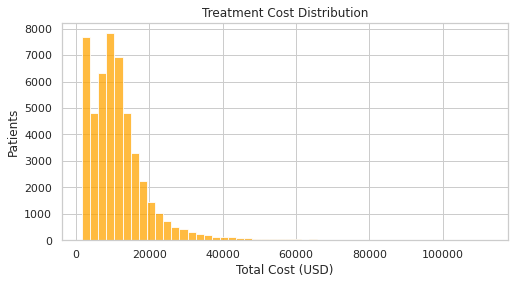

In [15]:
## 2. Total Cost Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['total_cost_usd'], bins=50, color='orange')
plt.title("Treatment Cost Distribution")
plt.xlabel("Total Cost (USD)")
plt.ylabel("Patients")
plt.show()


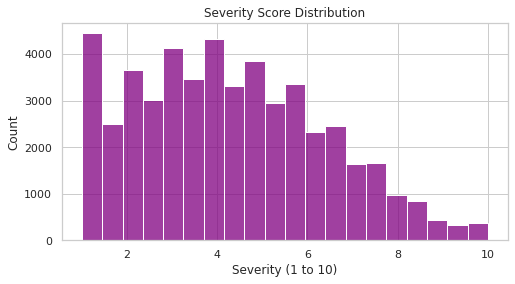

In [17]:
## 3. Severity Score Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['severity_score_1_10'], bins=20, color='purple')
plt.title("Severity Score Distribution")
plt.xlabel("Severity (1 to 10)")
plt.ylabel("Count")
plt.show()

/tmp/ipykernel_3561717/3838496405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='outcome', palette='Set2')


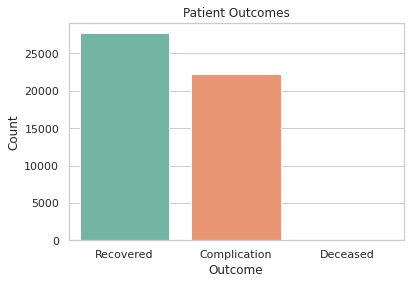

In [18]:
## 4. Outcome Countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='outcome', palette='Set2')
plt.title("Patient Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

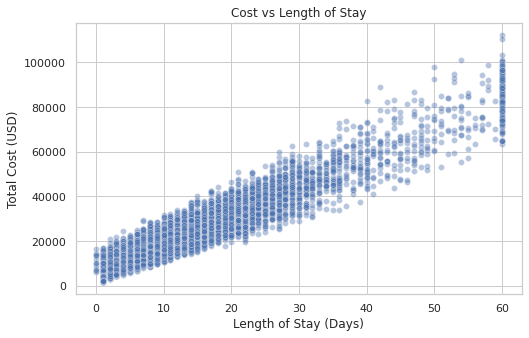

In [19]:
## 5. Cost vs Length of Stay
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='length_of_stay_days', y='total_cost_usd', alpha=0.4)
plt.title("Cost vs Length of Stay")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Total Cost (USD)")
plt.show()

/tmp/ipykernel_3561717/670618075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='outcome', y='severity_score_1_10', palette="Set3")


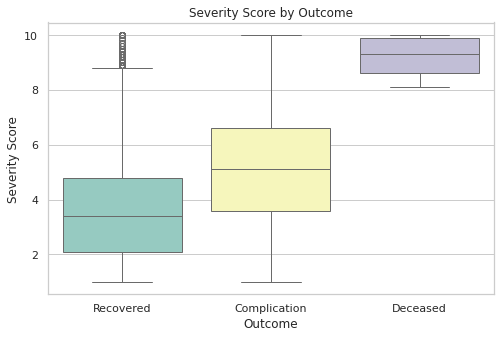

In [20]:
## 6. Severity by Outcome (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='outcome', y='severity_score_1_10', palette="Set3")
plt.title("Severity Score by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Severity Score")
plt.show()

/tmp/ipykernel_3561717/3613275856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='readmission_30d_flag', y='comorbidity_count', palette="coolwarm")


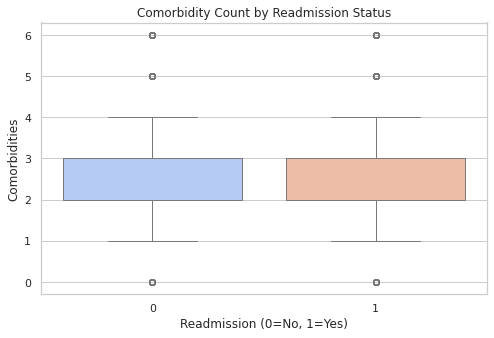

In [21]:
## 7. Readmission vs Comorbidity
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='readmission_30d_flag', y='comorbidity_count', palette="coolwarm")
plt.title("Comorbidity Count by Readmission Status")
plt.xlabel("Readmission (0=No, 1=Yes)")
plt.ylabel("Comorbidities")
plt.show()